## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os, stat
import skimage
import cv2
from PIL import Image
from skimage import exposure
import scipy.misc
from skimage import io
import pylab as pl
import glob
import pydicom
from PIL import ImageFilter
import cv2
import numpy as np
import scipy
from sklearn.decomposition import PCA
import pickle as pickle
import random
import os
import scipy.ndimage as ndi

## Setting paths

In [2]:
direc1="C://Users//pranav//Downloads//Compressed//1512427//brainTumorDataPublic_1-766"
direc2="C://Users//pranav//Downloads//Compressed//1512427//brainTumorDataPublic_767-1532"
direc3="C://Users//pranav//Downloads//Compressed//1512427//brainTumorDataPublic_1533-2298"
direc4="C://Users//pranav//Downloads//Compressed//1512427//brainTumorDataPublic_2299-3064"
newdir="F://Imagedata"

### Showing Sample Image

1.0
Image Size: (512, 512)


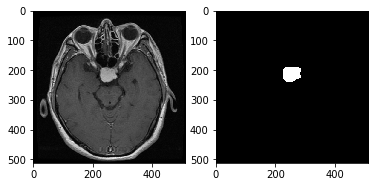

In [3]:
##
import hdf5storage
mat = hdf5storage.loadmat(os.path.join(direc1,"37.mat"))
data =mat['cjdata'][0]
print(data[0][0][0])
plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[2],cmap="gray")
print("Image Size:",data[2].shape)
plt.subplot(1,2,2)
plt.imshow(data[4],cmap="gray")
plt.show()


# Extracting and saving data to F://newdir

In [4]:
First_time =False
def Extract_data(directory):
    Category=[]
    for file in os.listdir(directory):
        filename =os.path.join(directory,file)
        mat = hdf5storage.loadmat(filename)
        data =mat['cjdata'][0]
        Category.append(data[0][0][0])
        PID.append(data[1])
        image_data = data[2]    
        if(not os.path.exists(os.path.join(newdir,"Totaldata"))):
            os.mkdir(os.path.join(newdir,"Totaldata"))

        scipy.misc.imsave(os.path.join(newdir,"Totaldata",file[:-4]+".jpg"),image_data)
        #pd.DataFrame(Category,columns=['Category']).to_csv("F://Imagedata//Category"+directory[72:]+".csv")
    return(np.array(Category))
        #scipy.misc.imsave(os.path.join(binary,file[:-4]+".jpg"),binary_mask)
        
def data_load(First_time):
    if(First_time == True):
        Category=Extract_data(direc1)
        print("Data set one Extracted")
        Category=np.append(Category,Extract_data(direc2))
        print("Data set two Extracted")
        Category=np.append(Category,Extract_data(direc3))
        print("Data set three Extracted")
        print(Category.shape)
        Category=np.append(Category,Extract_data(direc4))
        print("Its done")
        #Category=np.array(Category)
        pd.DataFrame(Category,columns=['Category']).to_csv("F://Imagedata//Category"+".csv")
    else:
        print("Move ahead. Thank  you")
%time data_load(First_time)

Move ahead. Thank  you
Wall time: 2.01 ms


In [5]:
def load_category(directory):
    Category=[]
    PID=[]
    for file in os.listdir(directory):
        filename =os.path.join(directory,file)
        mat = hdf5storage.loadmat(filename)
        data =mat['cjdata'][0]
        Category.append(data[0][0][0])
        PID.append(data[1])
        #image_data = data[2]
        #binary_mask =data[4]
        #binary=os.path.join(newdir,directory[72:]+"_binary")
        #if(not os.path.exists(binary)):
        #    os.mkdir(binary)
        #if(not os.path.exists(os.path.join(newdir,directory[72:]))):
        #    os.mkdir(os.path.join(newdir,directory[72:]))
            
        #plt.imsave(fname=os.path.join(newdir,directory[72:],file[:-4]+".jpg"),arr=image_data,cmap="gray")
        #pl.imsave(fname=os.path.join(binary,file[:-4]+".jpg"),arr=binary_mask,cmap="gray")
    return( Category , PID)
    

In [6]:
#Category file is already Created
#(Category,PID)=load_category(direc1)
#Category=np.array(Category)

#pd.DataFrame(Category,columns=['Category'],index=np.arange(1,767)).to_csv("F://Imagedata//Category767-1532.csv")
Category=pd.read_csv("F://Imagedata//Category.csv",index_col=0)

In [7]:
newdir=os.path.join(newdir,"Totaldata")

In [8]:
def noise_filtering(img_location):
    im=Image.open(img_location)
    im1 = im.filter(ImageFilter.MedianFilter(size=3))
    return np.array(im1)
# Contrast stretching
def con_stretch(img):

    p2, p98 = np.percentile(img, (10, 98))
    img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_rescale

# Equalization
def img_equ(img):
    img_eq = exposure.equalize_hist(img)
    return img_eq
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)
def enhance(Image,cont,en=True):
    if(en==True):
        con=cont
        Image = Image.filter(ImageFilter.MedianFilter(size=3))#NOISE FILTERING
        imq=change_contrast(Image,con)# increase the contrast
        #Sharpen the image
        imq=imq.filter(ImageFilter.SHARPEN)
        imq=change_contrast(imq,con)
        imq=np.array(imq)
        
        #imq=exposure.equalize_hist(imq)
        imq=con_stretch(imq)
        return imq
    else:
        return "stupidity"

## Example of image conversion

(512, 512)
(512, 512)


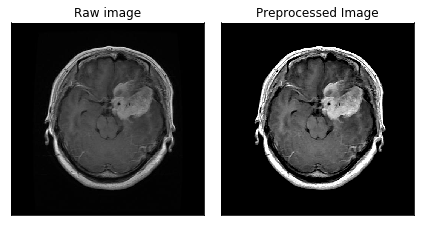

In [9]:
sample="F://Imagedata//Totaldata/2.jpg"
norm= io.imread(sample)
print(norm.shape)
im1=enhance(Image.open(sample),15)
print(im1.shape)
plt.figure()
fig = plt.subplot(1 ,2, 1)
plt.imshow(np.array(norm), cmap=plt.cm.gray)
plt.title("Raw image")
plt.xticks(())
plt.yticks(())
fig =plt.subplot(1,2,2)
plt.imshow(im1,cmap="gray")
plt.title("Preprocessed Image")
plt.xticks(())
plt.yticks(())
plt.tight_layout()
plt.show()

In [10]:
def power(image):
    # Normalize images for better comparison.
    image = (image - image.mean()) / image.std()
    return image

## We are preprocessing the image by denoising, increasing the contrast, sharpening and equalising the image

In [11]:
cont15="F://Imagedata//enhanced_contstretch"
print(newdir)
if(not os.path.isdir(cont15)):
    os.mkdir(cont15)

F://Imagedata\Totaldata


In [12]:
def makefol(make=False):
    if(make==True):
        for file in os.listdir(newdir):
            img =Image.open(os.path.join(newdir,file))
            img1=enhance(img,50)
            ##imgp=psucol(img1)
            scipy.misc.imsave(os.path.join(cont15,file), img1)
            

In [13]:
##Takes time 2min 24s
%time makefol(make=False)

Wall time: 0 ns


## Plotting the histogram

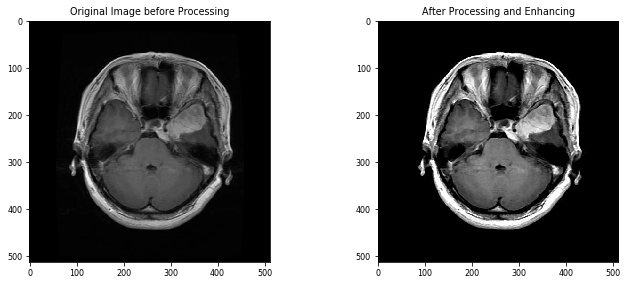

In [14]:
def plot(img,title):
    img=io.imread(img)
    plt.hist(img.ravel(),200,[5,250]);
    plt.title(title);
    plt.xlabel("Pixel Value")
    plt.ylabel("Pixel Intensity")
   # print(img.ravel()[kite].shape)
    return plt
sample_img="F://Imagedata//Totaldata//1.jpg"
sample_preImg="F://Imagedata//enhanced_contstretch//1.jpg"
#bin_img="F://newdata//1  T2W-FLAIR - 301 binary/binaryBS.050170 - IM-0003-0001-0001.jpg"
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    image =io.imread(image)
    #image = crop_image(image,bin_img)
    image = img_as_float(image)
    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    #ax_hist.ticklabel_format(axis='y', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0,1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf,'r')
    ax_cdf.set_yticks([])
    #print(type(ax_cdf))

    return ax_img, ax_hist, ax_cdf


# Display results
#binim=io.imread("F://newdata/1  T2W-FLAIR - 301 binary//binaryBS.050170 - IM-0003-0001-0001.jpg")
fig =plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(io.imread(sample_img),cmap="gray")
plt.title("Original Image before Processing")

plt.subplot(1,2,2)
plt.imshow(io.imread(sample_preImg),cmap="gray")
plt.title("After Processing and Enhancing")

#]We find that doing the processing the image histogram is distributed 
plt.tight_layout()
plt.show()

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

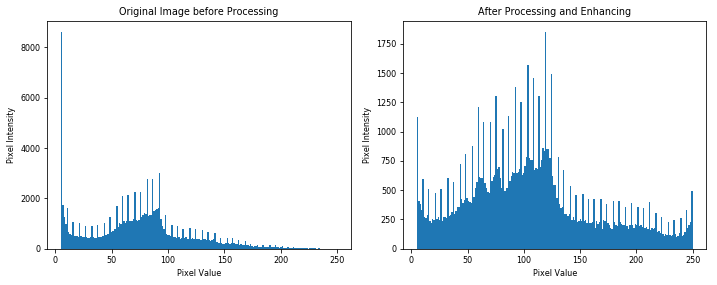

In [15]:
#binim=io.imread("F://newdata/1  T2W-FLAIR - 301 binary//binaryBS.050170 - IM-0003-0001-0001.jpg")
fig =plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot(sample_img,"Original Image before Processing")
plt.subplot(1,2,2)
plot(sample_preImg,"After Processing and Enhancing")
#We find that doing the processing the image histogram is distributed 
plt.tight_layout()
plt.show()

## Extracting the gabor features

In [16]:
from skimage.measure import shannon_entropy
newdir=cont15

In [17]:
# define gabor filter bank with different orientations and at different scales
def build_filters():
    filters = []
    ksize = 9
    #define the range for theta and nu
    for theta in np.arange(0, np.pi, np.pi / 8):
        for nu in np.arange(0, 6*np.pi/4 , np.pi / 4):
            kern = cv2.getGaborKernel((ksize, ksize), 1.0, theta, nu, 0.5, 0, ktype=cv2.CV_32F)
            kern /= 1.5*kern.sum()
            filters.append(kern)
            #print(kern.shape)
    return filters

def compute_feats(image, kernels):
    feats = np.zeros((len(kernels), 2), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap')
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
    return feats


#
def gabor(imgg):
    #instantiating the filters
    filters = build_filters()

    f = np.asarray(filters)
    # Add singleton dimension

    #reading the input image
    #imgg = cv2.imread(filename,0)
    image= power(imgg)
    #initializing the feature vector
    feat = []

    #calculating the local energy for each convolved image
    for k, kernel in enumerate(f):
        filtered = ndi.convolve(image, kernel, mode='reflect')
        feat.append(filtered.mean())
        feat.append(filtered.var())
        feat.append(shannon_entropy(filtered))
    return np.array(feat)
    #fet matrix is the feature vector for the image
def gbor():
    images=[]
    gfeats=[]
    for file in os.listdir(newdir):
        #bin_img=os.path.join(binim,"binary"+file)
        
        fileadd=os.path.join(newdir,file)
        
        fileadd=io.imread(fileadd)
        images.append(file[0:-4])
        #cropped_img=crop_image(fileadd,bin_img)
       # print(file+" feature extracted")
        plt.imshow(fileadd)
        gfeats.append(gabor(fileadd))
    return (images,gfeats)

In [18]:
Recreate = False
def Gabr():
    if((not os.path.isfile("F://newgbor.csv") )or Recreate):
        images=[]
        gfeats=[]
        images,gfeats=gbor()
        gfeats=np.array(gfeats)
        print(gfeats.shape)
        images=np.array(images)
        col=["name"]
        for x in range(1,gfeats.shape[1]):
            col.append("gabf"+str(x))
        gaborf =pd.DataFrame(columns=col)
        gaborf["name"]=images
        for index,z in enumerate(col[1:]):
            gaborf[z]=gfeats[:,index]
        gaborf.to_csv("F://newgbor.csv")
    else :
        gaborf =pd.read_csv("F://newgbor.csv",index_col=0)
    return gaborf


In [19]:
##takes time 1hour 53 min 
%time gaborf=Gabr()

Wall time: 1.05 s


In [20]:
names=gaborf[["name"]]
names=names.astype('int')

In [21]:
##Removing the columns with zero values
gaborf=gaborf.loc[:, (gaborf != 0).any(axis=0)]

gaborf.head(2)

,name,gabf4,gabf5,gabf6,gabf7,gabf8,gabf9,gabf10,gabf11,gabf12,...,gabf134,gabf135,gabf136,gabf137,gabf138,gabf139,gabf140,gabf141,gabf142,gabf143
0,1,-7.285839e-17,0.437677,8.299060,6.245005e-17,0.486050,8.299504,-1.595946e-16,0.640155,8.300483,...,1059.736365,8.302553,8.326673e-17,0.565846,8.302404,-3.469447e-18,0.450440,8.302353,-4.857226e-17,0.431322
1,10,2.775558e-17,0.439260,7.750173,-6.938894e-17,0.491702,7.749225,-1.561251e-16,0.665204,7.749978,...,562.980698,7.752159,-1.838807e-16,0.550636,7.751748,2.775558e-17,0.449204,7.751734,5.204170e-17,0.430766


In [22]:
X=gaborf.iloc[:,1:];
X = X.loc[:, (X != 0).any(axis=0)]
cor=X.corr()
cor.head(5)

,gabf4,gabf5,gabf6,gabf7,gabf8,gabf9,gabf10,gabf11,gabf12,gabf13,...,gabf134,gabf135,gabf136,gabf137,gabf138,gabf139,gabf140,gabf141,gabf142,gabf143
gabf4,1.000000,-0.026921,0.014512,-0.005646,0.000773,0.014519,0.019567,0.002798,0.014511,0.002964,...,0.002853,0.014521,-0.000342,0.005591,0.014522,-0.005461,-0.005129,0.014520,-0.007191,-0.022965
gabf5,-0.026921,1.000000,-0.351494,-0.007355,0.288901,-0.351500,0.011405,0.143739,-0.351515,-0.029085,...,-0.070141,-0.351608,0.129958,0.127558,-0.351593,0.209820,0.672770,-0.351586,0.228072,0.789124
gabf6,0.014512,-0.351494,1.000000,0.022106,0.219470,1.000000,-0.004225,0.247099,1.000000,-0.035166,...,0.088735,1.000000,-0.031954,0.134172,1.000000,-0.049851,-0.161179,1.000000,-0.052910,-0.587885
gabf7,-0.005646,-0.007355,0.022106,1.000000,-0.012061,0.022104,0.006793,-0.013343,0.022105,-0.006837,...,-0.016608,0.022098,-0.016876,-0.018749,0.022098,-0.011497,-0.019908,0.022101,-0.008211,-0.007794
gabf8,0.000773,0.288901,0.219470,-0.012061,1.000000,0.219451,0.022536,0.980255,0.219430,-0.033387,...,0.807984,0.219270,-0.105019,0.937616,0.219294,-0.162693,0.789612,0.219309,-0.175824,-0.289968


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(X)
X=pca.transform(X)

In [24]:
%time gaborf=Gabr()
names=gaborf[["name"]]
names=names.astype('int')
y =[]
for x in names.values:
    value =Category.values[x-1][0][0]
    y.append(value)
y=np.array(y)


Wall time: 200 ms


## As we can see a lot of variables with coorelation >0.5 so we choose a reduction of features such that Coorealation is <0.5. Dimensions exhibiting higher correlation can lower down the performance of model. Moreover, it is not good to have multiple variables of similar information or variation also known as “Multicollinearity”.Variables having higher value ( VIF > 5 ) can be dropped.

In [25]:
X=gaborf.iloc[:,1:];
X = X.loc[:, (X != 0).any(axis=0)]
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [26]:
##3min 53sec
Recreate = False
def corre():
    if((not os.path.isfile("F://dimension_reduced_features.csv") )or Recreate):
        X=calculate_vif_(X)
        print(X.shape)
        X.to_csv("F://dimension_reduced_features.csv")
    else :
        X =pd.read_csv("F://dimension_reduced_features.csv",index_col=0)
    return X

In [27]:
data=corre()
cor=data.corr()
cor.head(5)
data.head()



,gabf4,gabf7,gabf10,gabf13,gabf16,gabf28,gabf58,gabf64,gabf70,gabf76,gabf79,gabf82,gabf85,gabf88,gabf113,gabf116
0,-7.285839e-17,6.245005e-17,-1.595946e-16,-9.367507e-17,-1.040834e-17,2.081668e-17,9.783840e-16,-5.898060e-17,-5.551115e-17,-3.469447e-17,3.469447e-18,3.816392e-16,-7.285839e-17,3.469447e-18,0.414170,93.613748
1,2.775558e-17,-6.938894e-17,-1.561251e-16,-3.122502e-17,7.979728e-17,-6.938894e-18,-8.465451e-16,6.938894e-18,6.938894e-17,1.908196e-16,-1.734723e-16,4.857226e-17,-5.204170e-17,1.075529e-16,0.412072,34.657664
2,1.335737e-16,-7.806256e-17,-1.196959e-16,-5.724587e-17,-1.370432e-16,3.122502e-17,7.389922e-16,2.949030e-17,-4.510281e-17,1.092876e-16,-9.714451e-17,2.949030e-17,2.324529e-16,-1.231654e-16,0.411824,61.744615
3,1.196959e-16,2.428613e-17,2.081668e-17,-1.509209e-16,-9.367507e-17,-5.377643e-17,-1.543904e-16,-6.418477e-17,1.040834e-17,1.335737e-16,-4.683753e-17,-1.092876e-16,-9.540979e-17,-6.591949e-17,0.399367,82.228001
4,-7.806256e-17,-7.112366e-17,-6.765422e-17,-4.336809e-17,-7.112366e-17,1.908196e-17,1.458902e-15,1.786765e-16,3.295975e-17,-6.938894e-17,-5.898060e-17,-9.540979e-17,-1.665335e-16,-4.336809e-17,0.397742,88.917863


In [28]:
y =[]
for x in names.values:
    value =Category.values[x-1][0][0]
    y.append(value)
y=np.array(y)

In [29]:
print("shape of X :", X.shape)
print("shape of y :",y.shape)

shape of X : (3064, 119)
shape of y : (3064,)


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)

(2451, 119)


In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [32]:
print(X_train.shape)

(2451, 119)


In [33]:
from sklearn import svm
SVC =svm.SVC(C=1,kernel="rbf",gamma='scale')
SVC.fit(X_train,y_train)
print("testing Score :" ,SVC.score(X_test,y_test))
print("training score:",SVC.score(X_train,y_train))

testing Score : 0.7373572593800979
training score: 0.7515299877600979


## Presentation

Confusion matrix, without normalization
[[ 85  57  11]
 [ 34 227  13]
 [ 21  25 140]]
Normalized confusion matrix
[[0.56 0.37 0.07]
 [0.12 0.83 0.05]
 [0.11 0.13 0.75]]


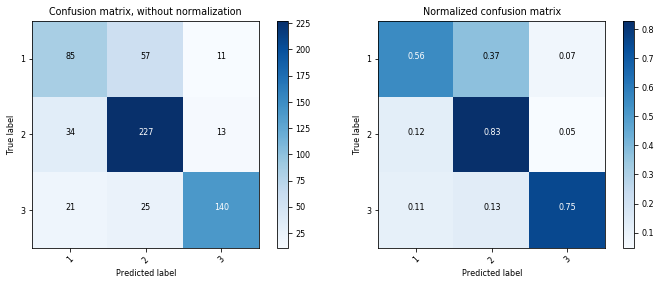

In [34]:
y_pred=SVC.predict(X_test)
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names=[1,2,3]
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

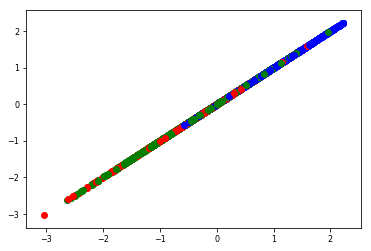

In [35]:
from sklearn.feature_selection import SelectKBest, f_regression

sel=SelectKBest(f_regression, k=2)
X_train=sel.fit_transform(X_train, y_train)
X_test=sel.transform(X_test)
for x in range(len(X_train)):
    if(y_train[x]==1):
        color="red"
        
    elif (y_train[x]==2):
        color ="green"
    else :
        color="blue"
    plt.scatter(X_train[x][0],X_train[x][1],c=color)

plt.show()

### ROC Curve

In [36]:
X=gaborf.iloc[:,1:];
X = X.loc[:, (X != 0).any(axis=0)]
print(X.shape)
print(y.shape)

(3064, 119)
(3064,)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with


# Binarize the output
y1= label_binarize(y, classes=[1,2,3])
n_classes = y1.shape[1]

# Add noisy features to make the problem harder

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=.5,
                                                    random_state=0)
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
random_state = np.random.RandomState(0)
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

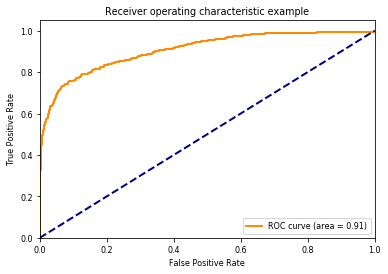

In [39]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

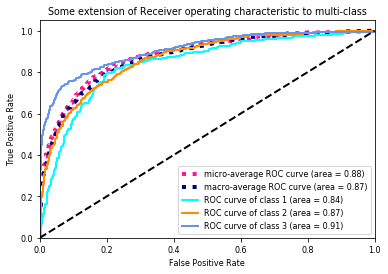

In [61]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Harr Transform
 In information theory, information entropy is the log-base-2 of the number of possible outcomes for a message.

For an image, local entropy is related to the complexity contained in a given neighborhood, typically defined by a structuring element. The entropy filter can detect subtle variations in the local gray level distribution.
how to detect texture in the camera image using a smaller structuring element.

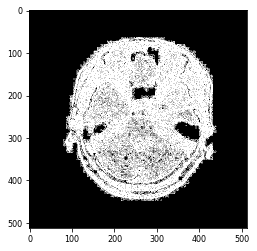

In [38]:
image=io.imread("F://Imagedata//enhanced_contstretch//1.jpg")
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
def harrtransform(image):
    image = image
    x=entropy(image, disk(1))
    
    x=(x-np.amin(x))/(np.amax(x)-np.amin(x))
    return x
plt.imshow(harrtransform(image),cmap="gray")
plt.show()

In [39]:
newdir="F://Imagedata//enhanced_contstretch"
directory="F://Imagedata//entropy"
control=False## Already done
def saveImg(newdir,control=False):
    if(control):
        X=[]
        count=0
        for file in os.listdir(newdir):
            count+=1
            filename=os.path.join(newdir ,file)
            image=io.imread(filename)
            if(image.shape!=(512,512)):
                image=cv2.resize(image,(512,512))
            X=np.append(X,harrtransform(image))
            if(count%300==0):
                np.save("F://Imagedata//entropy//features_"+str(count/300)+".npy",X)
                X=[]
        np.save("F://Imagedata//entropy//features_"+str(count/300+1)+".npy",X)
saveImg(newdir,control)

In [40]:
files=['features_1.0.npy','features_2.0.npy','features_3.0.npy','features_4.0.npy','features_5.0.npy','features_6.0.npy','features_7.0.npy','features_8.0.npy','features_9.0.npy','features_10.0.npy','features_10.213333333333333.npy']

In [42]:
files=['features_1.0.npy','features_2.0.npy','features_3.0.npy','features_4.0.npy','features_5.0.npy','features_6.0.npy','features_7.0.npy','features_8.0.npy','features_9.0.npy','features_10.0.npy','features_10.213333333333333.npy']
create_array=True
def dimenred(directory,files):
    for x,file in enumerate(files):
        count=x+1
        if(count<4):
            fold=os.path.join("F://Imagedata//entropy_1",str(count))
            if(not os.path.isdir(fold)):
                os.mkdir(fold)
            filename=os.path.join(directory,file)
            data=np.load(filename)
            data=data.reshape(-1,512*512)
            pca = PCA(n_components=0.99)
            pca.fit(data)

            for x,file in enumerate(os.listdir(directory)):
                filename=os.path.join(directory,file)
                data=np.load(filename)
                data=data.reshape(-1,512*512)
                data=pca.transform(data)
                np.save(os.path.join(fold,file),data[::-1])
if(create_array==True):
    %time dimenred(directory,files)

Wall time: 6min 20s


In [67]:
folder="F://Imagedata//entropy_1//9"
X=[]
for file in files:
    filename=os.path.join(folder,file)
    data=np.load(filename)[::-1]
    X=np.append(X,data)
X=X.reshape(3064,-1)
print(X.shape)
print(y.shape)

(3064, 282)
(3064,)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
print(X_train.shape)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 
from sklearn import svm
SVC =svm.SVC(C=1,kernel="rbf",gamma='scale')
SVC.fit(X_train,y_train)
print("testing Score :" ,SVC.score(X_test,y_test))
print("training score:",SVC.score(X_train,y_train))

(2451, 282)
testing Score : 0.8597063621533442
training score: 0.9237046103631171


Confusion matrix, without normalization
[[100  48   5]
 [  2 267   5]
 [  4  22 160]]
Normalized confusion matrix
[[0.65 0.31 0.03]
 [0.01 0.97 0.02]
 [0.02 0.12 0.86]]


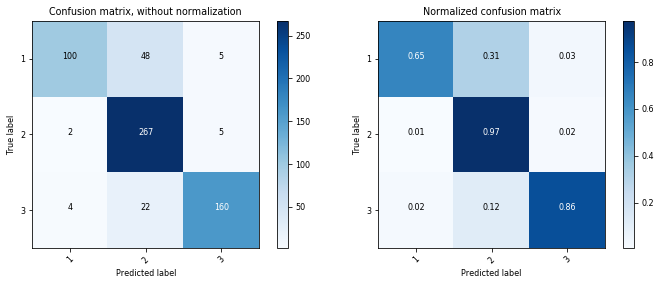

In [69]:
y_pred=SVC.predict(X_test)
y_pred1=SVC.predict(X_train)
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
class_names=[1,2,3]
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(1,2,2)
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [50]:
X1=X_train[y_train==1][:,0]
X1.shape

(456,)

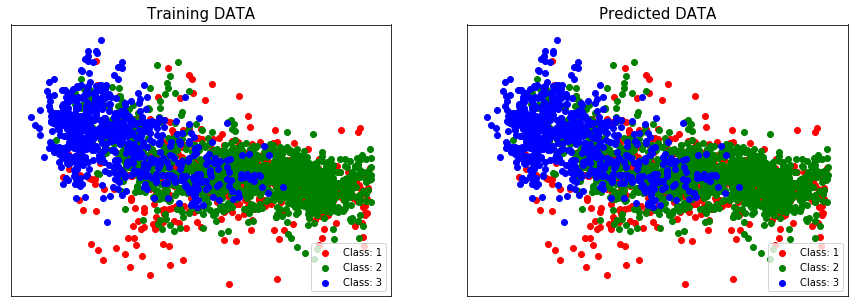

In [75]:
from sklearn.feature_selection import SelectKBest, f_regression

sel=SelectKBest(f_regression, k=2)
X_train=sel.fit_transform(X_train, y_train)
X_test=sel.transform(X_test)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
color=["red","green","blue"]
lab=[1,2,3]
for x in range(1,4):
    X1=X_train[y_train==x][:,0]
    X2=X_train[y_train==x][:,1]
    plt.scatter(X1,X2,c=color[x-1],label="Class: "+str(lab[x-1]))
    plt.legend(loc="lower right",fontsize=10)
plt.title("Training DATA",size=15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
y_train=y_pred1
for x in range(1,4):
    X1=X_train[y_train==x][:,0]
    X2=X_train[y_train==x][:,1]
    plt.scatter(X1,X2,c=color[x-1],label="Class: "+str(lab[x-1]))
    plt.legend(loc="lower right",fontsize=10)
plt.title("Predicted DATA",size=15)
plt.xticks([])
plt.yticks([])
plt.show()